In [1]:
# Imports
# Note: To read Excel files, install 'xlrd' but you don't have to import
#   To write Excel files, install 'openpyxl' but you don't have to import
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import sys, csv, json, tables, requests, sqlite3
from lxml import objectify
from io import StringIO
pd.options.display.max_rows = 10 # limit displayed rows to 10

<center>Common pandas file and format methods</center>

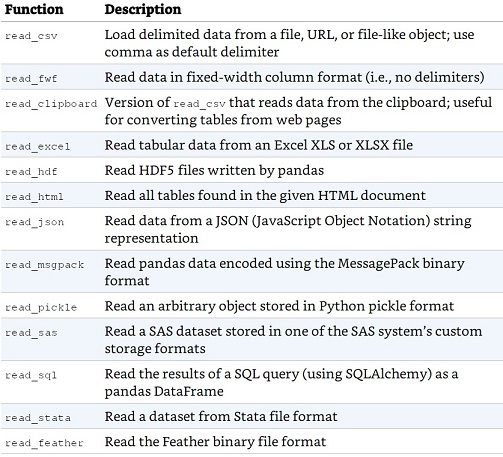

In [2]:
# Read data from file. .csv & .txt formats 
df = pd.read_csv('examples/ex1.csv') # read a .csv into a DataFrame
print(df, '\n')
# read a file that does not contain a header row. Use default column names
print(pd.read_csv('examples/ex2.csv', header = None), '\n') 
# read file not containing a header row but specify column names
print(pd.read_csv('examples/ex2.csv', 
                  names=['a', 'b', 'c', 'd', 'message']), '\n')

names = ['a', 'b', 'c', 'd', 'message'] # use 'message column to label rows
print(pd.read_csv('examples/ex2.csv', names = names, 
                  index_col = 'message'), '\n')

# create a hierarchical index using columns 'key1' and 'key2'
parsed = pd.read_csv('examples/csv_mindex.csv', 
                      index_col = ['key1', 'key2'])
print(parsed, '\n')

# open .txt file that has whitespace as a delimiter by using a regular exp
result = pd.read_csv('examples/ex3.txt', sep = '\s+')
print(result, '\n') 
# Note:first row only had three column names while other rows had 4 items. 
# this caused read_csv to infer that items in the first column are indexes 

# Use 'skiprows' to filter out rows with uninteresting data
print(pd.read_csv('examples/ex4.csv', skiprows = [0, 2, 3]), '\n')

# Handling missing values
print("Handling Missing Values \n")
result = pd.read_csv('examples/ex5.csv')
print(result, '\n')

# 'isnull()' returns a binary matrix that detects missing values
print(pd.isnull(result), '\n') 

# Argument 'na_values' uses a sequence of values to replace with NA.
result = pd.read_csv('examples/ex5.csv', na_values = ['NULL']) 
print(result, '\n')

# You can specify different NA indicators for each column using a dict
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
print(pd.read_csv('examples/ex5.csv', na_values = sentinels))

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

   0   1   2   3      4
0  1   2   3   4  hello
1  5   6   7   8  world
2  9  10  11  12    foo 

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

         a   b   c   d
message               
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12 

           value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16 

            A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491 

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

Handling Missing Values 

  something  a   b 

<center>Common read_csv() arguments</center>
    
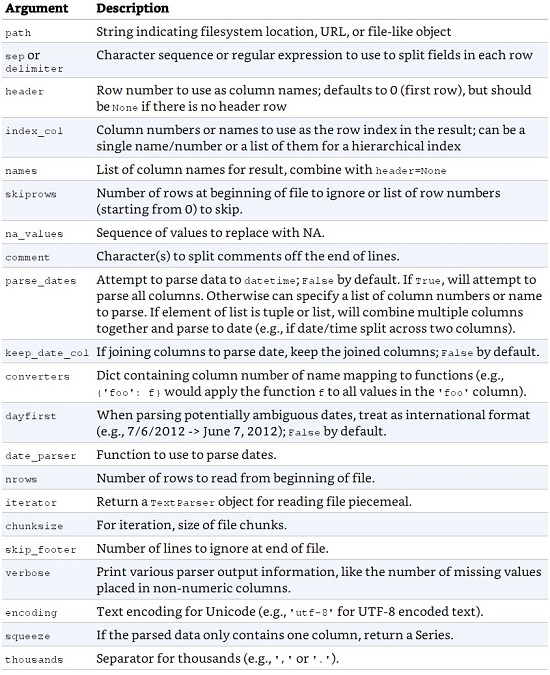

In [3]:
# Handling large files
result = pd.read_csv('examples/ex6.csv') # read large file
print(result, '\n')
print(pd.read_csv('examples/ex6.csv', nrows = 5), '\n') # read first 5 rows

# use 'chunksize' argument to read file in blocks
chunker = pd.read_csv('examples/ex6.csv', chunksize = 1000)
print(type(chunker), '\n')

# Read  file in blocks combining values in each row specified by 'Key'
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value = 0) # NaNs = 0
tot = tot.sort_values(ascending = False) # sort largest to smallest
print(tot)

           one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns] 

        one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q 

<class 'pandas.io.parsers.TextFileReader'> 

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     .

In [4]:
# Writing data to a file
data = pd.read_csv('examples/ex5.csv')
print(data, '\n')

# write data to a comma seperated text file
data.to_csv('examples/out.csv') # save 'out.csv' to disk
# use '!type' for 'Windows' and '!cat' for 'Unix'
!type examples\out.csv
print()
data.to_csv(sys.stdout, sep = '|') # Write to file: 'stdout'
print()
data.to_csv(sys.stdout, na_rep='NULL') # Replace missing values with 'NULL'
print()
# Supress 'Header' and 'Index' labels'
data.to_csv(sys.stdout, index = False, header = False) 
print()
# Specify which columns to write. In this case, write columns 'a', 'b', 'c'
data.to_csv(sys.stdout, index = False, columns = ['a', 'b', 'c']) 
print()

# You can also use the 'Series' '.to_csv()' method to write a file
dates = pd.date_range('1/1/2000', periods = 7)
ts = pd.Series(np.arange(7), index = dates)
ts.to_csv('examples/tseries.csv') # write 'tseries.csv' to disk
!type examples\tseries.csv

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo 

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo

a,b,c
1,2,3.0
5,6,
9,10,11.0



c:\users\gonzo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


In [5]:
# Working with Delimiters
# Use Python csv module to for files containing single-character delimiters
f = open('examples/ex7.csv')
reader = csv.reader(f)
for line in reader:  # Reads file line by line removing 'quote' characters
    print(line)
f.close()            # Remember to close open files
print()

with open('examples/ex7.csv') as f: #Files opened using 'with' are autoclosed
    lines = list(csv.reader(f))   # read file into list of lines
header, values = lines[0], lines[1:] # Parse headers and data
# Use dict comprehension to unpack data and assign to columns
data_dict = {h: v for h, v in zip(header, zip(*values))}
print(data_dict, '\n')

# to create a new delimiter, string quotation or line terminator:
class my_dialect(csv.Dialect): # first define a 'csv.Dialect' subclass
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

f = open('examples/ex7.csv')
# then open 'csv.reader()' using this subclass
reader = csv.reader(f, dialect = my_dialect) 
# Use csv.reader() arguments to avoid defining a subclass
reader = csv.reader(f, delimiter = '|')
f.close()

# use csv.writer with csv.Dialect to save file with custom delimiters
with open('examples\mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect = my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))
!type examples\mydata.csv

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')} 

one;two;three
1;2;3
4;5;6
7;8;9


<center>csv.reader() and csv.Dialect arguments</center>

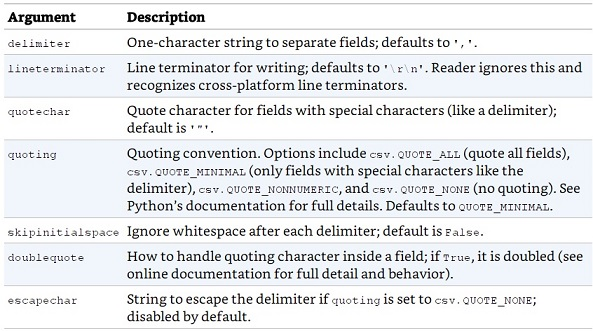

In [6]:
# JSON (JavaScript Object Notation)
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
result = json.loads(obj)    # Convert JSON to a dictionary
print(type(result), result, '\n')
asjson = json.dumps(result) # Convert python object to JSON
print(type(asjson), asjson, '\n')

# Convert to pandas DataFrame selecting data fields of interest
siblings = pd.DataFrame(result['siblings'], columns = ['name', 'age'])
print(siblings, '\n')
# read JSON directly into DataFrame using 'pandas.read_json()' method
data = pd.read_json('examples/example.json')
print(data, '\n')
# Convert from pandas Series or DataFrame to JSON using 'data.to_json()'
print(data.to_json(), '\n')
print(data.to_json(orient = 'records'))

<class 'dict'> {'name': 'Wes', 'places_lived': ['United States', 'Spain', 'Germany'], 'pet': None, 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']}, {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]} 

<class 'str'> {"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]} 

    name  age
0  Scott   30
1  Katie   38 

   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9 

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}} 

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [7]:
# HTML using 'pandas.readhtml()' module
tables = pd.read_html('examples/fdic_failed_bank_list.html')
print(len(tables))
failures = tables[0]
print(failures.head(), '\n')
# Example: data cleaning & analysis: find number of bank failures by year
close_timestamps = pd.to_datetime(failures['Closing Date'])
print(close_timestamps.dt.year.value_counts)

1
                      Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  
1                          United Bank     August 19, 2016  November 17, 2016  
2  First-Citizens Bank & Trust Company         May 6, 2016  September 6, 2016  
3           The Bank of Fayette County      April 29, 2016  September 6, 2016  
4  First-Citizens Bank & Trust Company      March 11, 2016      June 16, 2016   

<bound method IndexOpsMixin.value_counts of 0      2016
1      2016
2      2016
3      2016
4      2016
       ... 
542    2001
543    20

In [8]:
# XML (eXtensible Markup Language) using lxml.objectify
path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()  # get root node of XML file

data = []
skip_fields = [' PARENT_SEQ', 'INDICATOR_SEQ', # exclude these tags
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

# 'root.INDICATOR' creates a generator for each <INDICATOR> element
for elt in root.INDICATOR:  
    el_data = {}   # empty dict
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval # create dict of tag names
    data.append(el_data)

perf = pd.DataFrame(data) # convert dicts to DataFrame
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PARENT_SEQ,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,,5,2008,96.6,95


In [9]:
tag = '<a href="http://www.google.com">Google </a>'
root = objectify.parse(StringIO(tag)).getroot()

# From root, you can access any field
print(type(root))
print(root)
print(root.get('href')) # 'href' tag
print(root.text)
root

<class 'lxml.objectify.ObjectifiedElement'>
Google 
http://www.google.com
Google 


<Element a at 0x247eb4459c8>

In [10]:
# Using pickle
frame = pd.read_csv('examples/ex1.csv')
print(frame, '\n')
frame.to_pickle('examples/frame_pickle') # write pickle file to disk
print(pd.read_pickle('examples/frame_pickle'))  # read pickle file

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo 

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo


In [11]:
# Using HDF5 (hierarchical Data Format 5)
# Use pandas HDFStore class to load data into Series and DataFrame objects
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
print(type(store))
print(store['obj1'], '\n')

store.put('obj2', frame, format = 'table') # use table storage schema
# query using special syntax
print(store.select('obj2', where = ['index >= 10 and index <= 15']), '\n')
store.close()

# pandas can access HDF5 files directly
frame.to_hdf('mydata.h5', 'obj3', format = 'table')
print(pd.read_hdf('mydata.h5', 'obj3', mode = 'a', where = ['index < 5']))

<class 'pandas.io.pytables.HDFStore'>
           a
0   0.218198
1  -0.427051
2  -0.824630
3   0.604611
4  -1.942291
..       ...
95 -1.062532
96 -0.066580
97  1.251350
98 -1.032912
99 -0.164663

[100 rows x 1 columns] 

           a
10  0.116856
11 -0.160073
12  1.375328
13  0.698029
14 -2.407730
15  0.968485 

          a
0  0.218198
1 -0.427051
2 -0.824630
3  0.604611
4 -1.942291


In [12]:
# Getting data from .xls, .xlsx files
# Use 'ExcelFile()' to create an instance by specifying the file path
xlsx = pd.ExcelFile('examples/ex1.xlsx') 
pd.read_excel(xlsx, 'Sheet1') # Load into DataFrame using 'read_excel()'

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [13]:
# Can also load file directly by specifying the path into 'read_excel()'
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
print(frame, '\n')

# Use 'ExcelWriter()' to save data into .xls or .xlsx files
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')      # Create or Open file
#writer.save()                         # Write data to disk
#frame.to_excel('examples/ex2.xlsx')   # Or do it all in one step

# Using Web APIs example
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
print(resp, '\n')

data = resp.json()   # Parse JSON information using '.json()'
print(data[0]['title'])

# Create a DataFrame with the desired fields
issues = pd.DataFrame(data, columns = ['number', 'title', 
                                       'labels', 'state'])
issues

   Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo 

<Response [200]> 

DEPR: Index.contains, RangeIndex._start, _stop, _step


,number,title,labels,state
0,30103,"DEPR: Index.contains, RangeIndex._start, _stop...",[],open
1,30102,REF: implement io.pytables.DataCol._get_atom,"[{'id': 47229190, 'node_id': 'MDU6TGFiZWw0NzIy...",open
2,30101,REF: collect pytables DataCol.set_data calls i...,[],open
3,30100,REF: implement io.pytables._maybe_adjust_name,"[{'id': 47229190, 'node_id': 'MDU6TGFiZWw0NzIy...",open
4,30099,CI: Unwanted patterns checks,[],open
...,...,...,...,...
25,30061,Replace custom macro with stdlib,[],open
26,30057,Resampling on index and column after groupby g...,[],open
27,30056,DOC: Documentation for MultiIndex.get_locs() ...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
28,30054,DOC: Style format,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open


In [14]:
# Querying Databases: Example SQL
# Create a database
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

con = sqlite3.connect('mydata.sqlite')
con.execute(query)

In [15]:
con.commit()

In [16]:
# create some data
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)

In [17]:
con.commit()

In [18]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
print(rows, '\n')
print(cursor.description)
pd.DataFrame(rows, columns = [x[0] for x in cursor.description])

[('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3), ('Sacramento', 'California', 1.7, 5)] 

(('a', None, None, None, None, None, None), ('b', None, None, None, None, None, None), ('c', None, None, None, None, None, None), ('d', None, None, None, None, None, None))


,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [19]:
# Easier way to get data from a database using SQLAlchemy
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
